# LAB 04.02 - Buiding Datasets

In [1]:
!wget --no-cache -O init.py -q https://raw.githubusercontent.com/fagonzalezo/ai4eng-unal/main/content/init.py
import init; init.init(force_download=False); init.get_weblink()
init.endpoint

'https://m5knaekxo6.execute-api.us-west-2.amazonaws.com/dev-v0001/rlxmooc'

In [ ]:
from local.lib.rlxmoocapi import submit, session
session.LoginSequence(endpoint=init.endpoint, course_id=init.course_id, lab_id="L04.02", varname="student");

## Understand the ASHRAE Energy Prediction in Kaggle

Follow this link: [https://www.kaggle.com/c/ashrae-energy-prediction](https://www.kaggle.com/c/ashrae-energy-prediction), register for the task and download the data.

In particular, understand:

- The machine learning task they define (what they want to predict)
- How the data is provided
- The structure and relation between the files `train.csv`, `weather_train.csv` and `building_metadata.csv`

In [3]:
from dotenv import load_dotenv
from pathlib import Path
import os

env_path = Path('../.env')
if load_dotenv(): print('Env loaded')
else: print('Env not loaded')

Env loaded


In [4]:
!kaggle competitions download -c ashrae-energy-prediction

 90%|█████████████████████████████████████    | 342M/379M [00:00<00:00, 707MB/s]
100%|█████████████████████████████████████████| 379M/379M [00:00<00:00, 705MB/s]


In [5]:
!unzip -q ashrae-energy-prediction.zip

## Task 1: Build a training dataset

Execute the cell below and you will be given a **building_id** and a **date**. You will have to:

1. Build a table containing one row per hour and the following columns **only for that building_id and date**: 
       'meter_reading', 'site_id', 'air_temperature', 'cloud_coverage',
       'dew_temperature', 'precip_depth_1_hr', 'sea_level_pressure',
       'wind_direction', 'wind_speed', 'square_feet', 'year_built'
   Note that you will have to gather this information from the different csv sources.
   
1. use only measures with `meter`=0
1. Fill any missing values with zero.
1. Extract the column of the target variable and sum all values.
1. Sum all the values of the rest of the columns.
1. Fill in those values in the variables below.
1. Submit your answer.

Observe that, with this dataset, we could train a model to make predictions of the target variable, taking the rest of the variables as input.

For instance, for building number 900, on 2016-02-01:
- there are 24 records
- the sum of all values of the target variable is 4941 (cropping decimals)
- the sum of all values of the rest of the variables is 2705422 (cropping decimals)

In [6]:
from IPython.display import Image
from local.lib import labutils
import numpy as np
bid, date = labutils.biddate_for_student(student.user_id)
print ("your building_id", bid)
print ("your date       ", date)

your building_id 971
your date        2016-02-05


In [7]:
import pandas as pd

train = pd.read_csv('train.csv')
weather = pd.read_csv('weather_train.csv')
building = pd.read_csv('building_metadata.csv')

train = train[train['building_id'] == bid]
train = train[train['timestamp'].str.contains(date)]
weather = weather[weather['timestamp'].str.contains(date)]
building = building[building['building_id'] == bid]

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 72 entries, 1931253 to 1984227
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   building_id    72 non-null     int64  
 1   meter          72 non-null     int64  
 2   timestamp      72 non-null     object 
 3   meter_reading  72 non-null     float64
dtypes: float64(1), int64(2), object(1)
memory usage: 2.8+ KB


In [9]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
Index: 384 entries, 840 to 132099
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   site_id             384 non-null    int64  
 1   timestamp           384 non-null    object 
 2   air_temperature     384 non-null    float64
 3   cloud_coverage      160 non-null    float64
 4   dew_temperature     384 non-null    float64
 5   precip_depth_1_hr   248 non-null    float64
 6   sea_level_pressure  351 non-null    float64
 7   wind_direction      377 non-null    float64
 8   wind_speed          384 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 30.0+ KB


In [10]:
building.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1 entries, 971 to 971
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   site_id      1 non-null      int64  
 1   building_id  1 non-null      int64  
 2   primary_use  1 non-null      object 
 3   square_feet  1 non-null      int64  
 4   year_built   0 non-null      float64
 5   floor_count  0 non-null      float64
dtypes: float64(2), int64(3), object(1)
memory usage: 56.0+ bytes


In [11]:
full_original = pd.merge(train, building, on=['building_id'], how='left')
full_original = pd.merge(full_original, weather, on=['site_id', 'timestamp'], how='left')
full_original = full_original[full_original['meter']==0]
full_original.info()

<class 'pandas.core.frame.DataFrame'>
Index: 24 entries, 0 to 69
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   building_id         24 non-null     int64  
 1   meter               24 non-null     int64  
 2   timestamp           24 non-null     object 
 3   meter_reading       24 non-null     float64
 4   site_id             24 non-null     int64  
 5   primary_use         24 non-null     object 
 6   square_feet         24 non-null     int64  
 7   year_built          0 non-null      float64
 8   floor_count         0 non-null      float64
 9   air_temperature     24 non-null     float64
 10  cloud_coverage      24 non-null     float64
 11  dew_temperature     24 non-null     float64
 12  precip_depth_1_hr   24 non-null     float64
 13  sea_level_pressure  24 non-null     float64
 14  wind_direction      21 non-null     float64
 15  wind_speed          24 non-null     float64
dtypes: float64(10),

In [12]:
df = full_original[['meter_reading', 'site_id', 'air_temperature', 'cloud_coverage',
       'dew_temperature', 'precip_depth_1_hr', 'sea_level_pressure',
       'wind_direction', 'wind_speed', 'square_feet', 'year_built']]

#### provide your answer here, drop the decimals

In [13]:
# target variable sum
sumY = df['meter_reading'].sum()

# input variables sum
sumX = df.drop(columns=['meter_reading']).sum().sum()

sumX, sumY

(7257434.5, 6158.0)

**submit your answer**

In [14]:
student.submit_task(globals(), task_id="task_01");

## Task 2. Time series missing data fix

Observe how we can fill in missing data in a time series, by simply repeating the last seen value in the missing places.

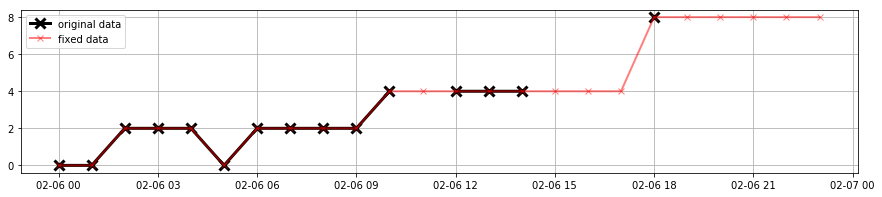

In [15]:
Image("local/imgs/timeseries-ffill.png")

Using the weather data from the ASHRAE Kaggle competition that you must have downloaded in the previous task you will have to:

1. Extract the time series for the variable `cloud_coverage` for **site_id=3** and for the **date assigned to you** (execute the cell below). This time series will have 24 values (including missing values).
1. Fill in the missing data by repeating the last seen value as in the example above
1. Report the time series as a Pyton list in the variable `fixed_ts` below

Again, use any tool of your choice to generate your result

In [16]:
from local.lib import labutils
_, date = labutils.biddate_for_student(student.user_id)
print ("your date       ", date)

your date        2016-02-05


#### fill in your fixed time series

In [17]:
df = weather[weather.site_id == 3]
fixed_ts = []
lastSeen = None
for val in df.cloud_coverage:
    if  np.isnan(val):
        fixed_ts.append(lastSeen)
    else:
        fixed_ts.append(val)
        lastSeen = val
print(fixed_ts)

[8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 4.0, 4.0, 4.0, 2.0, 2.0, 2.0, 2.0]


**submit your answer**

In [18]:
student.submit_task(globals(), task_id="task_02");

## Task 3. Build a time series predictive dataset

You will now build a predictive dataset for a single time series. This dataset can later be used with predictive models. The machine learning task we will try to adress is the following:

> **Given three consecutive points of a time series, we want a model to predict the next one.**

Starting from a time series (a list of of $n$ numbers) you will have to build a dataset such as in the following example



[44 45 42 38 47 45 46 44 47 52 53 48 46 42 42 34 30 27 24 24]


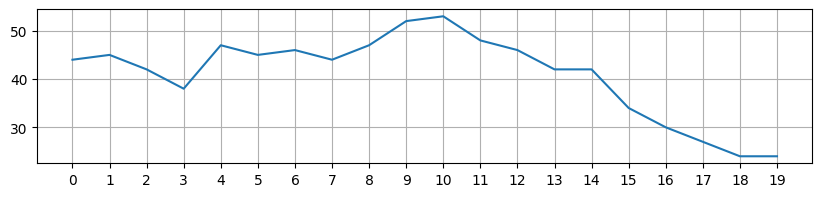

In [19]:

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

ts = np.r_[44, 45, 42, 38, 47, 45, 46, 44, 47, 52, 53, 48, 46, 42, 42, 34, 30, 27, 24, 24]
plt.figure(figsize=(10,2))
plt.xticks(range(len(ts)), range(len(ts)))
plt.grid();
plt.plot(ts)
print (ts)


dataset:

    [[[44, 45, 42], 38],
     [[45, 42, 38], 47],
     [[42, 38, 47], 45],
     [[38, 47, 45], 46],
     [[47, 45, 46], 44],
     [[45, 46, 44], 47],
     [[46, 44, 47], 52],
     [[44, 47, 52], 53],
     [[47, 52, 53], 48],
     [[52, 53, 48], 46],
     [[53, 48, 46], 42],
     [[48, 46, 42], 42],
     [[46, 42, 42], 34],
     [[42, 42, 34], 30],
     [[42, 34, 30], 27],
     [[34, 30, 27], 24],
     [[30, 27, 24], 24]]

observe that each line in the dataset represents one input-output pair, like a sliding window over the time series. 

We created two components:

- a matrix $X$ of dimensions `(len(ts)-n,3)` gathering all inputs, in the case above with dimensions `(17,3)`
- a vector $y$ of dimension `(len(ts)-n)` gathering each corresponding expected output, in the case above with dimensions `(17)`.

In this task, you will have to:

1. Take the time series you created in the previous task, where you fixed the missing values.
1. Build $X$, $y$ such as above with $n=3$. If your time series has 24 data points, then X dimensions will be (21,3) and y dimensions will be (21)

Again, use any tool of your choice to generate your result.

#### fill in your answer


In [20]:
X = [fixed_ts[i:i+3]for i in range(len(fixed_ts)-3)]

y = [fixed_ts[i+3]for i in range(len(fixed_ts)-3)]

**submit your answer**

In [21]:
student.submit_task(globals(), task_id="task_03");